In [1]:
import numpy as np
import sympy as sp
from sympy import latex
from IPython.display import display, Math, Markdown

- [ ] 
YanXu har Ct = a3,4/a2 = 0.8 (Ct er transmissjonskoeffisenten, som betyr at 80% av energien går i gjennom.)

... hvis du sier at bølgen avtar pga tanken... så kan vi dele på 0.008 ... altså 0.008/0.8 ‎ = 0.01. 

Måle samme om igjen, mer nøyaktig. bruke millimeterskala. ta feks glidende snitt av 10 bølgehøyder. 

[ ] Lese YanXu sin rapport. 
[ ] sjekke nøye - er bølgeamplituden i P2 samme med og uten vind?


---
                     


## Bølgetall
$K = \frac{\omega^2}{g} = \frac{(f*2*\pi)^2}{g}$

In [2]:
frequency = 1.3  # in Hz
length_scale = 2.6  # in meters
g = 9.8  # acceleration due to gravity in m/s^2

K = (2 * np.pi * frequency)**2 / g
L = 2*np.pi/K
KLe = K * length_scale

L_sym = sp.sympify(L)
K_sym = sp.sympify(K)
KLe_sym = sp.sympify(KLe)

print("Det dimensjonsløse bølgetallet. KL =", KLe_sym.evalf(4))  # Evaluate KLe with 4 numbers
display(Math(fr'\text{{Det dimensjonsløse bølgetallet, KL = }} {latex(KLe_sym.evalf(4))}'))
display(Math(r'\text{Det dimensjonsløse bølgetallet, KL = } ' + latex(KLe_sym.evalf(4))))

display(Math(fr'\text{{bølgelengden, }} \lambda = {latex(L_sym.evalf(4))}'))
display(Math(r'\text{bølgelengden, } \lambda = ' + latex(L_sym.evalf(4))))



Det dimensjonsløse bølgetallet. KL = 17.70


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

- [x]  spm til John: KL må det være lengden mellom probene eller lengden på geometrien?

svar: sjekk utstrekt og sammenpresset. 


| Condition                          | Probe 2 (mm) | Probe 3 (mm) | P3/P2 Ratio (Transmission) |
| ---------------------------------- | ------------ | ------------ | -------------------------- |
| **No panel (panelbeach)**          |              |              |                            |
| Nowind                             | 6.87         | 6.97         | **1.02**                   |
| Lowestwind                         | 6.65         | 6.97         | **1.05**                   |
| Lowestwind                         | 6.56         | 6.58         | **1.00**                   |
| Fullwind                           | 6.90         | 6.91         | **1.00**                   |
| **With panel (fullpanel, 2.62 m)** |              |              |                            |
| Nowind                             | 7.02         | 4.00         | **0.57**                   |
| Lowestwind                         | 7.07         | 4.29         | **0.61**                   |
| Fullwind                           | 6.90         | 5.02         | **0.73**                   |


husk at du gav nytt navn til filene.

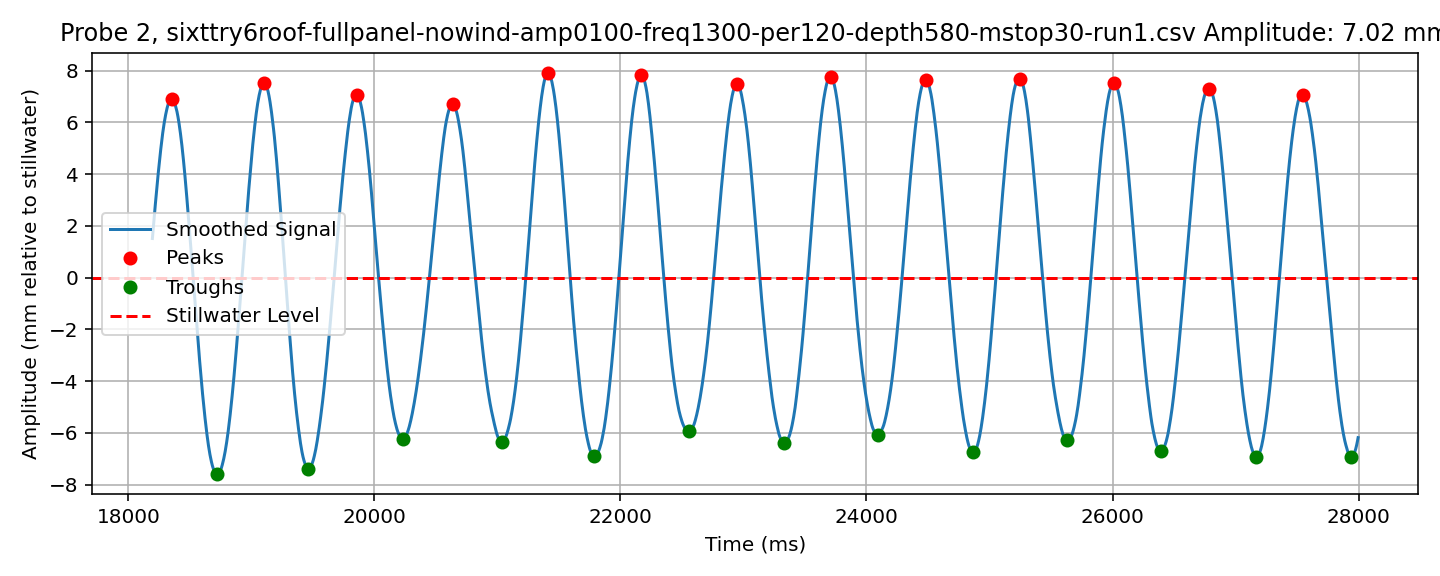

In [3]:
from IPython.display import Image

# Display the image using a relative path
Image(filename='waveresults/probe2_file0_amplitude.png')


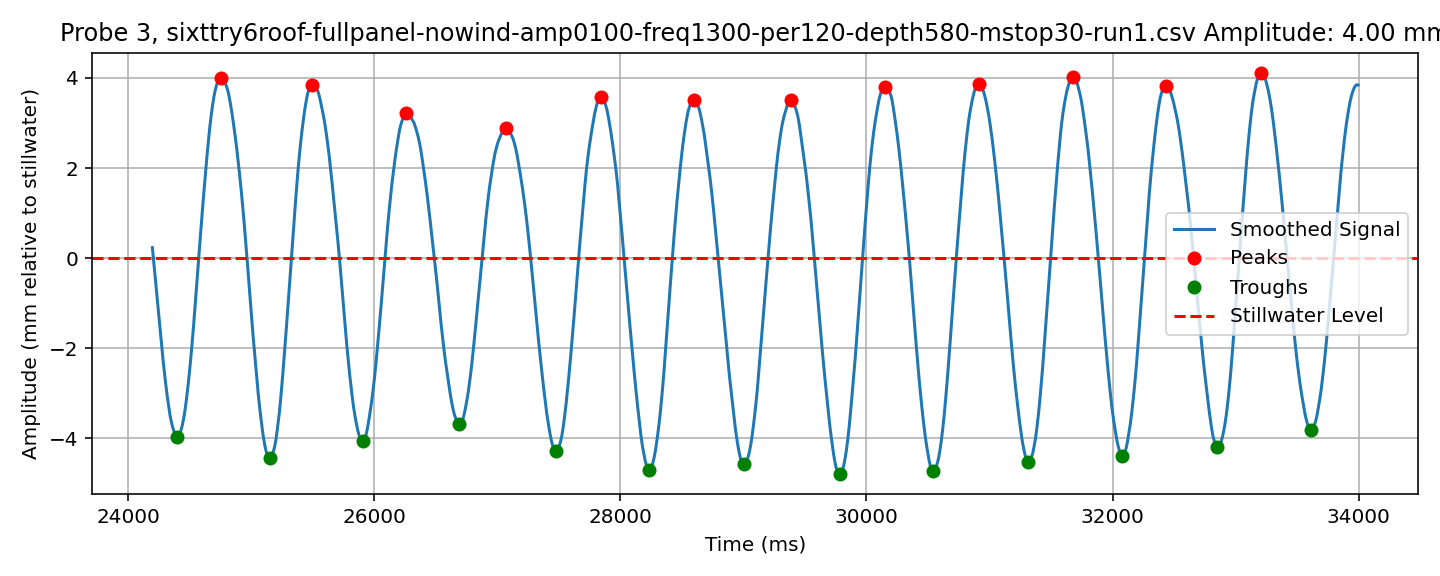

In [4]:
Image(filename='waveresults/probe3_file0_amplitude.png')

## Videre utforskning


forklaring: jon og yan hadde problemer med tanken på bølgelengde under 0.5 m. Med en lang geometri får man sett på de bølgene som relativt er kortere. 


- [ ] finne ut hva vindhastigheten er. finne ut av trykkmålern.


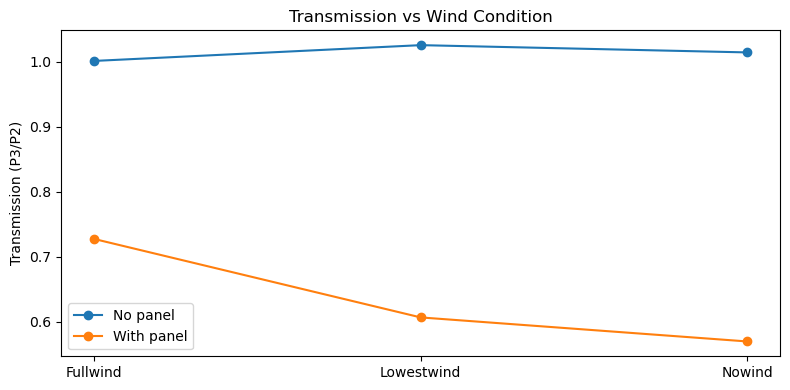

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
data = {
    'Panel': ['No panel']*4 + ['With panel']*3,
    'Wind': ['Nowind', 'Lowestwind', 'Lowestwind', 'Fullwind', 'Nowind', 'Lowestwind', 'Fullwind'],
    'Probe2': [6.87, 6.65, 6.56, 6.90, 7.02, 7.07, 6.90],
    'Probe3': [6.97, 6.97, 6.58, 6.91, 4.00, 4.29, 5.02],
}

df = pd.DataFrame(data)

# Combine duplicate wind entries for "No panel" by averaging if needed
df_grouped = df.groupby(['Panel', 'Wind']).mean().reset_index()

# Compute transmission and attenuation
df_grouped['Transmission'] = df_grouped['Probe3'] / df_grouped['Probe2']
df_grouped['Attenuation'] = 1 - df_grouped['Transmission']

wind_conditions = ['Nowind', 'Lowestwind', 'Fullwind']

# --- Plot 1: Transmission ---
plt.figure(figsize=(8,4))
for panel in df_grouped['Panel'].unique():
    subset = df_grouped[df_grouped['Panel'] == panel]
    plt.plot(subset['Wind'], subset['Transmission'], 'o-', label=panel)
plt.ylabel('Transmission (P3/P2)')
plt.title('Transmission vs Wind Condition')
plt.legend()
plt.tight_layout()
plt.show()

Plot shows how transmission stays ~1.0 for **no panel**, while for the **panel case**, transmission rises with wind (0.57 → 0.73).

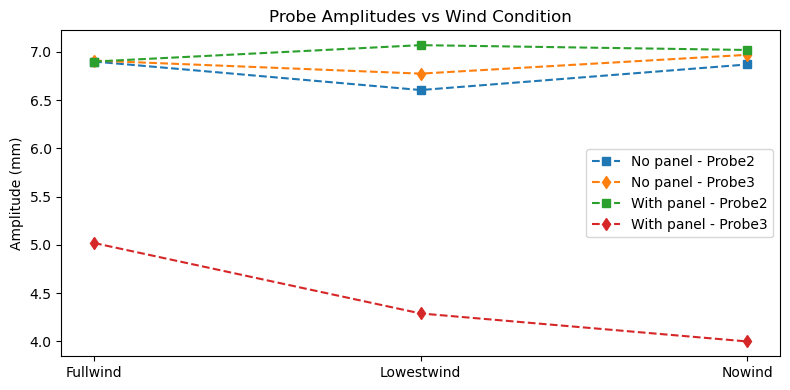

In [6]:
# --- Plot 2: Probe Amplitudes ---
plt.figure(figsize=(8,4))
for panel in df_grouped['Panel'].unique():
    subset = df_grouped[df_grouped['Panel'] == panel]
    plt.plot(subset['Wind'], subset['Probe2'], 's--', label=f'{panel} - Probe2')
    plt.plot(subset['Wind'], subset['Probe3'], 'd--', label=f'{panel} - Probe3')
plt.ylabel('Amplitude (mm)')
plt.title('Probe Amplitudes vs Wind Condition')
plt.legend()
plt.tight_layout()
plt.show()

**Probe 2 stays nearly constant** regardless of wind or panel, while **Probe 3 rises significantly with wind when the panel is present**.

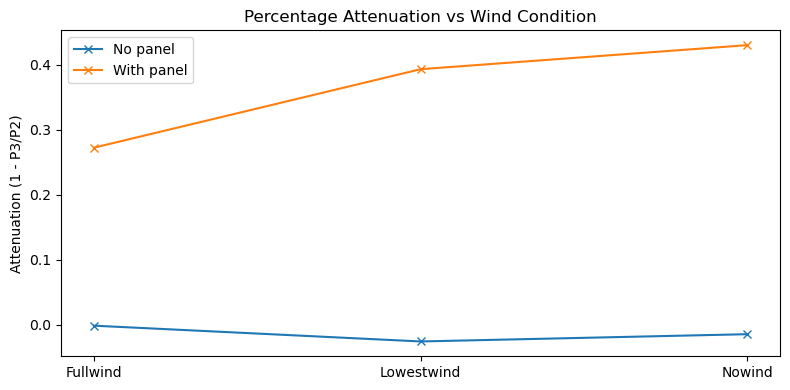

In [7]:

# --- Plot 3: Attenuation ---
plt.figure(figsize=(8,4))
for panel in df_grouped['Panel'].unique():
    subset = df_grouped[df_grouped['Panel'] == panel]
    plt.plot(subset['Wind'], subset['Attenuation'], 'x-', label=panel)
plt.ylabel('Attenuation (1 - P3/P2)')
plt.title('Percentage Attenuation vs Wind Condition')
plt.legend()
plt.tight_layout()
plt.show()

- **No panel:** attenuation hovers ~0% (a little negative due to small measurement noise).
    
- **With panel:** attenuation drops from ~43% (no wind) → ~27% (full wind).
    

...the panel is clearly effective at blocking transmission when wind is stronger.